# Employee Attrition Problem:

The data is for company X which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee.


# Objective: 

What type of employees are leaving? Determine which employees are prone to leave next. Present your results in the presentation sheet's presentation area.


In [7]:
# Initializing , importing libraries:

import numpy as np
import pandas as pd


In [8]:
# Merging Input files for better efficiency

df1=pd.read_excel('C:/Users/bharat/Downloads/TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx','Existing employees')
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [9]:
df2=pd.read_excel('C:/Users/bharat/Downloads/TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx','Employees who have left')
df2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [10]:
df=pd.concat([df1,df2])
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [11]:
# Adding dependant Variable for sake of convenience.

We have to add one more column of 'Status'. Let's say the employess whi have not left(i.e. currently working) are having Status value '0' and the employee left company are having status '1'

In [12]:
y1=pd.Series(np.zeros(len(df1)))
y2=pd.Series(np.ones(len(df2)))

In [13]:
y=pd.concat([y1,y2])
#y.columns=['Status']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [14]:
from sklearn.utils import shuffle
import numpy as np
dfmain=pd.concat([df,y],axis=1)
dftest=dfmain
dfmain=shuffle(dfmain)
dfmain = dfmain.rename(columns = {0:"status"})
dfmain.head()



,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
910,911,0.79,0.98,4,271,5,0,0,sales,low,1.0
9549,11550,0.73,0.92,6,189,3,1,0,sales,medium,0.0
7436,9437,0.69,0.56,5,271,3,0,0,support,low,0.0
2720,12721,0.42,0.49,2,139,3,0,0,hr,low,1.0
11188,13972,0.32,0.48,4,117,10,0,1,marketing,medium,0.0


# Conversion of data into desirable format 

As features containing essential data are in string format we have to perform Label Encoding:

In [15]:
dfmain['salary'],_=pd.factorize(dfmain['salary'])
dfmain['dept'],_=pd.factorize(dfmain['dept'])
dfmain.head()


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
910,911,0.79,0.98,4,271,5,0,0,0,0,1.0
9549,11550,0.73,0.92,6,189,3,1,0,0,1,0.0
7436,9437,0.69,0.56,5,271,3,0,0,1,0,0.0
2720,12721,0.42,0.49,2,139,3,0,0,2,0,1.0
11188,13972,0.32,0.48,4,117,10,0,1,3,1,0.0


Sorting Featrues i.e. independant variables and dependant variable i.e. 'status'

In [16]:
x= dfmain.drop(['status'],axis=1)
y=dfmain[['status']]


# Analysis by Logistic Regression:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
from sklearn.linear_model import LogisticRegression


In [19]:
classifier = LogisticRegression(random_state=0)


In [20]:
classifier.fit(x_train,y_train)


C:\Users\bharat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bharat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_predict = classifier.predict(x_test)


In [22]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,y_predict)*100
cm

76.82222222222222

_______________________________________________________________________________________________________________________________


Herewith we observed that, accuracy with logistic is nearly 78%. Instead of logistic, we Will try to improve performance with 'Support Vector Machine' (SVM)

 To apply SVM, we have to analyse the feeatures 
 Lets use Scatter plot for that

In [23]:
# We will take 'df' table again where we merged 2 tables.
print(dftest.head())
print(dftest.tail())

   Emp ID  satisfaction_level  last_evaluation  number_project  \
0    2001                0.58             0.74               4   
1    2002                0.82             0.67               2   
2    2003                0.45             0.69               5   
3    2004                0.78             0.82               5   
4    2005                0.49             0.60               3   

   average_montly_hours  time_spend_company  Work_accident  \
0                   215                   3              0   
1                   202                   3              0   
2                   193                   3              0   
3                   247                   3              0   
4                   214                   2              0   

   promotion_last_5years   dept salary    0  
0                      0  sales    low  0.0  
1                      0  sales    low  0.0  
2                      0  sales    low  0.0  
3                      0  sales    low  0.0  


In [24]:
df11=dftest[0:11427]
df12=dftest[11428:]

In [25]:
# Representing features with scattter plot:

import matplotlib.pyplot as plt
%matplotlib inline

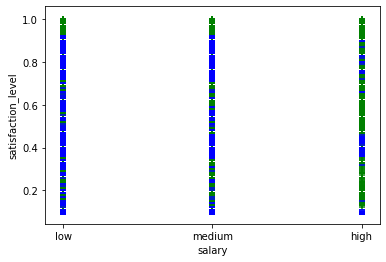

In [26]:
plt.xlabel('salary')
plt.ylabel('satisfaction_level')
plt.scatter(df11['salary'], df11['satisfaction_level'],color="green", marker='+')
plt.scatter(df12['salary'], df12['satisfaction_level'],color="blue", marker='_')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red", marker='*')


Performed same procedure with features. We got better result for following fields.

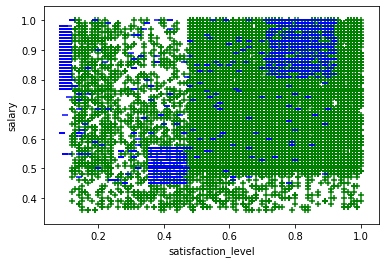

In [27]:
plt.xlabel('satisfaction_level')
plt.ylabel('salary')
plt.scatter(df11['satisfaction_level'], df11['last_evaluation'],color="green", marker='+')
plt.scatter(df12['satisfaction_level'], df12['last_evaluation'],color="blue", marker='_')



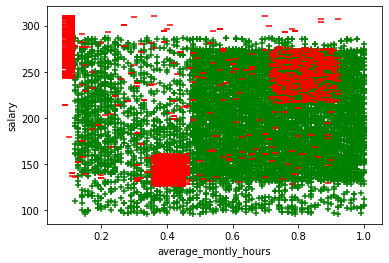

In [28]:
plt.xlabel('average_montly_hours')
plt.ylabel('salary')
plt.scatter(df11['satisfaction_level'], df11['average_montly_hours'],color="green", marker='+')
plt.scatter(df12['satisfaction_level'], df12['average_montly_hours'],color="red", marker='_')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red", marker='*')


So now we select only thses three features to varify the functionality of SVM

In [29]:
x1 = dfmain[['satisfaction_level','average_montly_hours','last_evaluation']]
y1 = dfmain[['status']]
x1.head()

,satisfaction_level,average_montly_hours,last_evaluation
910,0.79,271,0.98
9549,0.73,189,0.92
7436,0.69,271,0.56
2720,0.42,139,0.49
11188,0.32,117,0.48


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=0)

In [31]:
from sklearn.svm import SVC
model = SVC()

In [32]:
model.fit(X_train,y_train)

C:\Users\bharat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bharat\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
model.score(X_train,y_train)

0.8791313458424612

In [34]:
# Testing :
model.predict([[0.63,245,0.76]])

array([0.])

So we got accuracy mor in SVM model than logistic regression method which is nearly 88%. By proper hyper tuning of parameters(with precausion of not affecting other cirumstances) we can improve overall performance. Parameters are mostly like  regularisation parameter i.e. C  or gamma etc. 

_______________________________________________________________________________________________________________________________